In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import isoweek
import numpy as np

In [2]:
data_url = "http://www.sentiweb.fr/datasets/incidence-PAY-7.csv"

In [3]:
raw_data = pd.read_csv(data_url, encoding = 'iso-8859-1', skiprows=1)
raw_data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202206          7   9777     6916   12638      15          11   
1     202205          7  10851     7797   13905      16          11   
2     202204          7   9547     6721   12373      14          10   
3     202203          7  13972    10680   17264      21          16   
4     202202          7   8495     6026   10964      13           9   
5     202201          7  13793    10597   16989      21          16   
6     202152          7  13239     9611   16867      20          15   
7     202151          7  13326     9629   17023      20          14   
8     202150          7  14128    10312   17944      21          15   
9     202149          7  13674    10369   16979      21          16   
10    202148          7  11549     8503   14595      17          12   
11    202147          7  11419     8376   14462      17          12   
12    202146          7   8216     5724   10708      12           8   
13    202145          7   8965     6468   11462      14          10   
14    202144          7   8736     5636   11836      13           8   
15    202143          7   8145     5164   11126      12           7   
16    202142          7   9443     6037   12849      14           9   
17    202141          7   4021     2239    5803       6           3   
18    202140          7   4441     2454    6428       7           4   
19    202139          7   2291     1056    3526       3           1   
20    202138          7   4325     2267    6383       7           4   
21    202137          7   1964      754    3174       3           1   
22    202136          7   3441     1730    5152       5           2   
23    202135          7   2562     1107    4017       4           2   
24    202134          7   1429      378    2480       2           0   
25    202133          7   3829     1830    5828       6           3   
26    202132          7   4108     1895    6321       6           3   
27    202131          7   4793     2301    7285       7           3   
28    202130          7   7190     4191   10189      11           6   
29    202129          7   6800     4109    9491      10           6   
...      ...        ...    ...      ...     ...     ...         ...   
1598  199126          7  17608    11304   23912      31          20   
1599  199125          7  16169    10700   21638      28          18   
1600  199124          7  16171    10071   22271      28          17   
1601  199123          7  11947     7671   16223      21          13   
1602  199122          7  15452     9953   20951      27          17   
1603  199121          7  14903     8975   20831      26          16   
1604  199120          7  19053    12742   25364      34          23   
1605  199119          7  16739    11246   22232      29          19   
1606  199118          7  21385    13882   28888      38          25   
1607  199117          7  13462     8877   18047      24          16   
1608  199116          7  14857    10068   19646      26          18   
1609  199115          7  13975     9781   18169      25          18   
1610  199114          7  12265     7684   16846      22          14   
1611  199113          7   9567     6041   13093      17          11   
1612  199112          7  10864     7331   14397      19          13   
1613  199111          7  15574    11184   19964      27          19   
1614  199110          7  16643    11372   21914      29          20   
1615  199109          7  13741     8780   18702      24          15   
1616  199108          7  13289     8813   17765      23          15   
1617  199107          7  12337     8077   16597      22          15   
1618  199106          7  10877     7013   14741      19          12   
1619  199105          7  10442     6544   14340      18          11   
1620  199104          7   7913     4563   11263      14           8   
1621  199103          7  15387    10484   20290      27          18   
1622  199102          7  16277  

In [4]:
 raw_data[raw_data.isnull().any(axis=1)]

Empty DataFrame
Columns: [week, indicator, inc, inc_low, inc_up, inc100, inc100_low, inc100_up, geo_insee, geo_name]
Index: []

In [5]:
 data = raw_data.dropna().copy()
data

week  indicator    inc  inc_low  inc_up  inc100  inc100_low  \
0     202206          7   9777     6916   12638      15          11   
1     202205          7  10851     7797   13905      16          11   
2     202204          7   9547     6721   12373      14          10   
3     202203          7  13972    10680   17264      21          16   
4     202202          7   8495     6026   10964      13           9   
5     202201          7  13793    10597   16989      21          16   
6     202152          7  13239     9611   16867      20          15   
7     202151          7  13326     9629   17023      20          14   
8     202150          7  14128    10312   17944      21          15   
9     202149          7  13674    10369   16979      21          16   
10    202148          7  11549     8503   14595      17          12   
11    202147          7  11419     8376   14462      17          12   
12    202146          7   8216     5724   10708      12           8   
13    202145          7   8965     6468   11462      14          10   
14    202144          7   8736     5636   11836      13           8   
15    202143          7   8145     5164   11126      12           7   
16    202142          7   9443     6037   12849      14           9   
17    202141          7   4021     2239    5803       6           3   
18    202140          7   4441     2454    6428       7           4   
19    202139          7   2291     1056    3526       3           1   
20    202138          7   4325     2267    6383       7           4   
21    202137          7   1964      754    3174       3           1   
22    202136          7   3441     1730    5152       5           2   
23    202135          7   2562     1107    4017       4           2   
24    202134          7   1429      378    2480       2           0   
25    202133          7   3829     1830    5828       6           3   
26    202132          7   4108     1895    6321       6           3   
27    202131          7   4793     2301    7285       7           3   
28    202130          7   7190     4191   10189      11           6   
29    202129          7   6800     4109    9491      10           6   
...      ...        ...    ...      ...     ...     ...         ...   
1598  199126          7  17608    11304   23912      31          20   
1599  199125          7  16169    10700   21638      28          18   
1600  199124          7  16171    10071   22271      28          17   
1601  199123          7  11947     7671   16223      21          13   
1602  199122          7  15452     9953   20951      27          17   
1603  199121          7  14903     8975   20831      26          16   
1604  199120          7  19053    12742   25364      34          23   
1605  199119          7  16739    11246   22232      29          19   
1606  199118          7  21385    13882   28888      38          25   
1607  199117          7  13462     8877   18047      24          16   
1608  199116          7  14857    10068   19646      26          18   
1609  199115          7  13975     9781   18169      25          18   
1610  199114          7  12265     7684   16846      22          14   
1611  199113          7   9567     6041   13093      17          11   
1612  199112          7  10864     7331   14397      19          13   
1613  199111          7  15574    11184   19964      27          19   
1614  199110          7  16643    11372   21914      29          20   
1615  199109          7  13741     8780   18702      24          15   
1616  199108          7  13289     8813   17765      23          15   
1617  199107          7  12337     8077   16597      22          15   
1618  199106          7  10877     7013   14741      19          12   
1619  199105          7  10442     6544   14340      18          11   
1620  199104          7   7913     4563   11263      14           8   
1621  199103          7  15387    10484   20290      27          18   
1622  199102          7  16277  

In [6]:
def convert_week(year_and_week_int):
    year_and_week_str = str(year_and_week_int)
    year = int(year_and_week_str[:4])
    week = int(year_and_week_str[4:])
    w = isoweek.Week(year, week)
    return pd.Period(w.day(0), 'W')

data['period'] = [convert_week(yw) for yw in data['week']]

In [7]:
 sorted_data = data.set_index('period').sort_index()
sorted_data

week  indicator    inc  inc_low  inc_up  inc100  \
period                                                                     
1990-12-03/1990-12-09  199049          7   1143        0    2610       2   
1990-12-10/1990-12-16  199050          7  11079     6660   15498      20   
1990-12-17/1990-12-23  199051          7  19080    13807   24353      34   
1990-12-24/1990-12-30  199052          7  19375    13295   25455      34   
1990-12-31/1991-01-06  199101          7  15565    10271   20859      27   
1991-01-07/1991-01-13  199102          7  16277    11046   21508      29   
1991-01-14/1991-01-20  199103          7  15387    10484   20290      27   
1991-01-21/1991-01-27  199104          7   7913     4563   11263      14   
1991-01-28/1991-02-03  199105          7  10442     6544   14340      18   
1991-02-04/1991-02-10  199106          7  10877     7013   14741      19   
1991-02-11/1991-02-17  199107          7  12337     8077   16597      22   
1991-02-18/1991-02-24  199108          7  13289     8813   17765      23   
1991-02-25/1991-03-03  199109          7  13741     8780   18702      24   
1991-03-04/1991-03-10  199110          7  16643    11372   21914      29   
1991-03-11/1991-03-17  199111          7  15574    11184   19964      27   
1991-03-18/1991-03-24  199112          7  10864     7331   14397      19   
1991-03-25/1991-03-31  199113          7   9567     6041   13093      17   
1991-04-01/1991-04-07  199114          7  12265     7684   16846      22   
1991-04-08/1991-04-14  199115          7  13975     9781   18169      25   
1991-04-15/1991-04-21  199116          7  14857    10068   19646      26   
1991-04-22/1991-04-28  199117          7  13462     8877   18047      24   
1991-04-29/1991-05-05  199118          7  21385    13882   28888      38   
1991-05-06/1991-05-12  199119          7  16739    11246   22232      29   
1991-05-13/1991-05-19  199120          7  19053    12742   25364      34   
1991-05-20/1991-05-26  199121          7  14903     8975   20831      26   
1991-05-27/1991-06-02  199122          7  15452     9953   20951      27   
1991-06-03/1991-06-09  199123          7  11947     7671   16223      21   
1991-06-10/1991-06-16  199124          7  16171    10071   22271      28   
1991-06-17/1991-06-23  199125          7  16169    10700   21638      28   
1991-06-24/1991-06-30  199126          7  17608    11304   23912      31   
...                       ...        ...    ...      ...     ...     ...   
2021-07-19/2021-07-25  202129          7   6800     4109    9491      10   
2021-07-26/2021-08-01  202130          7   7190     4191   10189      11   
2021-08-02/2021-08-08  202131          7   4793     2301    7285       7   
2021-08-09/2021-08-15  202132          7   4108     1895    6321       6   
2021-08-16/2021-08-22  202133          7   3829     1830    5828       6   
2021-08-23/2021-08-29  202134          7   1429      378    2480       2   
2021-08-30/2021-09-05  202135          7   2562     1107    4017       4   
2021-09-06/2021-09-12  202136          7   3441     1730    5152       5   
2021-09-13/2021-09-19  202137          7   1964      754    3174       3   
2021-09-20/2021-09-26  202138          7   4325     2267    6383       7   
2021-09-27/2021-10-03  202139          7   2291     1056    3526       3   
2021-10-04/2021-10-10  202140          7   4441     2454    6428       7   
2021-10-11/2021-10-17  202141          7   4021     2239    5803       6   
2021-10-18/2021-10-24  202142          7   9443     6037   12849      14   
2021-10-25/2021-10-31  202143          7   8145     5164   11126      12   
2021-11-01/2021-11-07  202144          7   8736     5636   11836      13   
2021-11-08/2021-11-14  202145          7   8965     6468   11462      14   
2021-11-15/2021-11-21  202146          7   8216     5724   10708      12   
2021-11-22/2021-11-28  202147          7  11419     8376   14462      17   
2021-11-29/2021-12-05  202148          7  11549     8503   14595      17 

In [8]:
 periods = sorted_data.index
for p1, p2 in zip(periods[:-1], periods[1:]):
    delta = p2.to_timestamp() - p1.end_time
    if delta > pd.Timedelta('1s'):
        print(p1, p2)

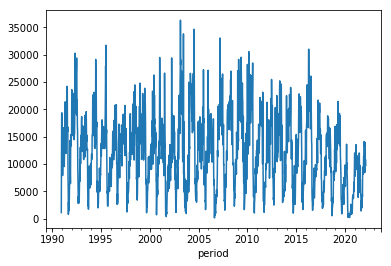

In [9]:
sorted_data['inc'].plot()

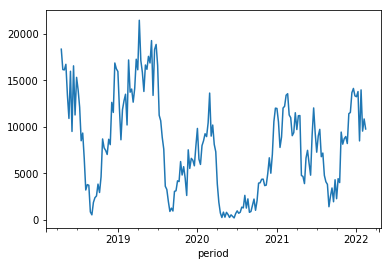

In [10]:
sorted_data['inc'][-200:].plot()

In [11]:
first_sept_week = [pd.Period(pd.Timestamp(y, 9, 1), 'W') for y in range(1991,sorted_data.index[-1].year)]
first_sept_week

[Period('1991-08-26/1991-09-01', 'W-SUN'),
 Period('1992-08-31/1992-09-06', 'W-SUN'),
 Period('1993-08-30/1993-09-05', 'W-SUN'),
 Period('1994-08-29/1994-09-04', 'W-SUN'),
 Period('1995-08-28/1995-09-03', 'W-SUN'),
 Period('1996-08-26/1996-09-01', 'W-SUN'),
 Period('1997-09-01/1997-09-07', 'W-SUN'),
 Period('1998-08-31/1998-09-06', 'W-SUN'),
 Period('1999-08-30/1999-09-05', 'W-SUN'),
 Period('2000-08-28/2000-09-03', 'W-SUN'),
 Period('2001-08-27/2001-09-02', 'W-SUN'),
 Period('2002-08-26/2002-09-01', 'W-SUN'),
 Period('2003-09-01/2003-09-07', 'W-SUN'),
 Period('2004-08-30/2004-09-05', 'W-SUN'),
 Period('2005-08-29/2005-09-04', 'W-SUN'),
 Period('2006-08-28/2006-09-03', 'W-SUN'),
 Period('2007-08-27/2007-09-02', 'W-SUN'),
 Period('2008-09-01/2008-09-07', 'W-SUN'),
 Period('2009-08-31/2009-09-06', 'W-SUN'),
 Period('2010-08-30/2010-09-05', 'W-SUN'),
 Period('2011-08-29/2011-09-04', 'W-SUN'),
 Period('2012-08-27/2012-09-02', 'W-SUN'),
 Period('2013-08-26/2013-09-01', 'W-SUN'),
 Period('20

In [12]:
 year = []
yearly_incidence = []
for week1, week2 in zip(first_sept_week[:-1],first_sept_week[1:]):
    one_year = sorted_data['inc'][week1:week2-1]
    assert abs(len(one_year)-52) < 2
    yearly_incidence.append(one_year.sum())
    year.append(week2.year)
yearly_incidence = pd.Series(data=yearly_incidence, index=year)

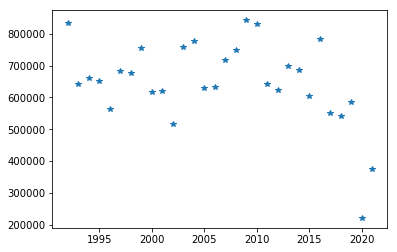

In [13]:
yearly_incidence.plot(style='*')

In [14]:
 yearly_incidence.sort_values()

2020    221186
2021    376290
2002    516689
2018    542312
2017    551041
1996    564901
2019    584066
2015    604382
2000    617597
2001    619041
2012    624573
2005    628464
2006    632833
2011    642368
1993    643387
1995    652478
1994    661409
1998    677775
1997    683434
2014    685769
2013    698332
2007    717352
2008    749478
1999    756456
2003    758363
2004    777388
2016    782114
2010    829911
1992    832939
2009    842373
dtype: int64